In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
download.file("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", "wine.zip")

In [5]:
unzip("wine.zip", "winequality-red.csv")

In [20]:
red_wine_data <- read_csv2("winequality-red.csv") |>
    mutate_if(is.character, as.numeric) |>
    mutate(quality = as.factor(quality))
red_wine_data 

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality
num (5): fixed acidity, residual sugar, free sulfur dioxide, pH, alcohol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.510,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.310,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


In [21]:
summary(red_wine_data)

 fixed acidity    volatile acidity  citric acid    residual sugar  
 Min.   :  5.00   Min.   :0.1200   Min.   :0.000   Min.   :  2.00  
 1st Qu.: 68.00   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 17.00  
 Median : 77.00   Median :0.5200   Median :0.260   Median : 22.00  
 Mean   : 74.99   Mean   :0.5278   Mean   :0.271   Mean   : 26.72  
 3rd Qu.: 91.00   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 25.50  
 Max.   :159.00   Max.   :1.5800   Max.   :1.000   Max.   :655.00  
                                                                   
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.01200   Min.   :  1.00      Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.:  7.00      1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median : 14.00      Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   : 16.56      Mean   : 46.43       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.: 21.00      3rd Qu.: 62.00       3rd Qu.:0.9

In [24]:
red_wine_data |> 
group_by(quality) |>
summarise(across(`fixed acidity`: `alcohol`, mean, na.rm = TRUE))

quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,83.60000,0.8845000,0.1710000,64.60000,0.12250000,11.00000,24.90000,0.9974640,277.7000,0.5700000,1.711000e+02
4,71.33962,0.6939623,0.1741509,24.90566,0.09067925,12.26415,36.24528,0.9965425,285.5094,0.5964151,9.866038e+01
5,73.50514,0.5770411,0.2436858,27.25110,0.09273568,16.98385,56.45214,0.9971036,297.4816,0.6209692,9.308957e+01
6,74.69749,0.4974843,0.2738245,22.47962,0.08495611,16.36050,40.86991,0.9966151,298.5721,0.6753292,3.434692e+12
7,81.26131,0.4039196,0.3751759,37.33668,0.07658794,17.43719,35.02010,0.9961043,294.7035,0.7412563,6.817420e+11
8,78.16667,0.4233333,0.3911111,23.77778,0.06844444,13.27778,33.44444,0.9952122,293.2222,0.7677778,9.094444e+01


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


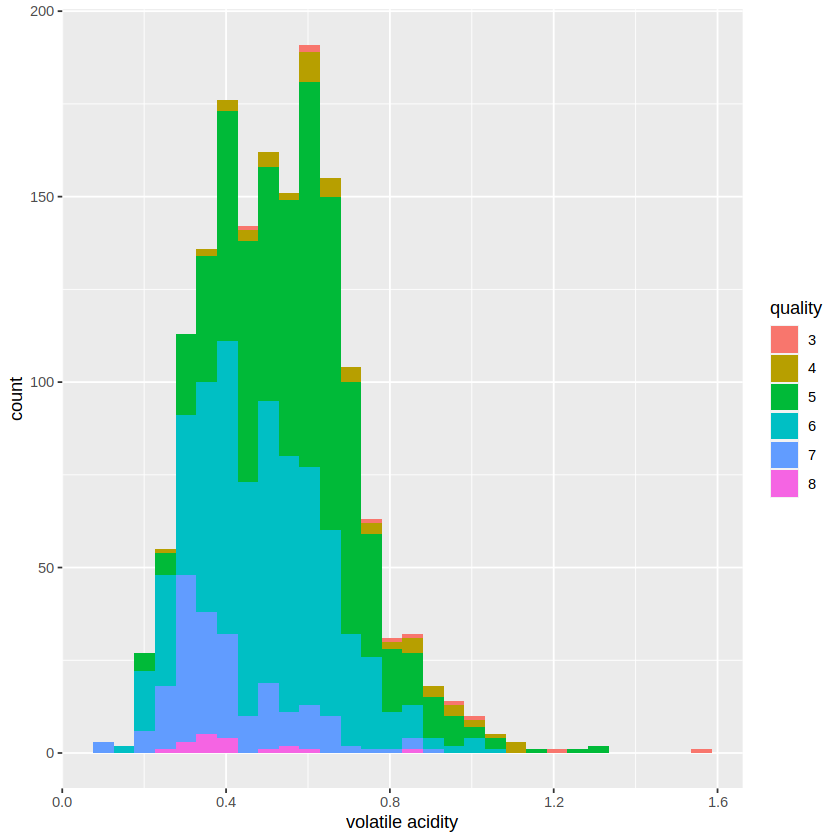

In [58]:
plot_2 <- red_wine_data |>
    ggplot(aes(x = `volatile acidity`, fill = quality),) +
    geom_histogram() 
plot_2

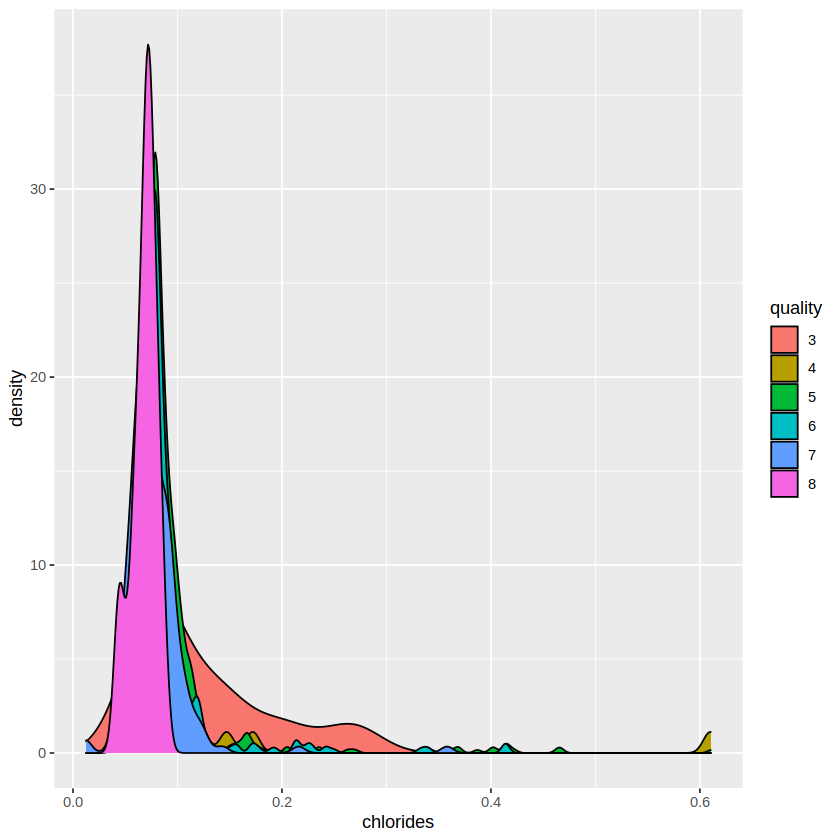

In [70]:
plot_1 <- red_wine_data |>
    ggplot(aes(x = `chlorides`, fill = quality),) +
    geom_density() 
plot_1

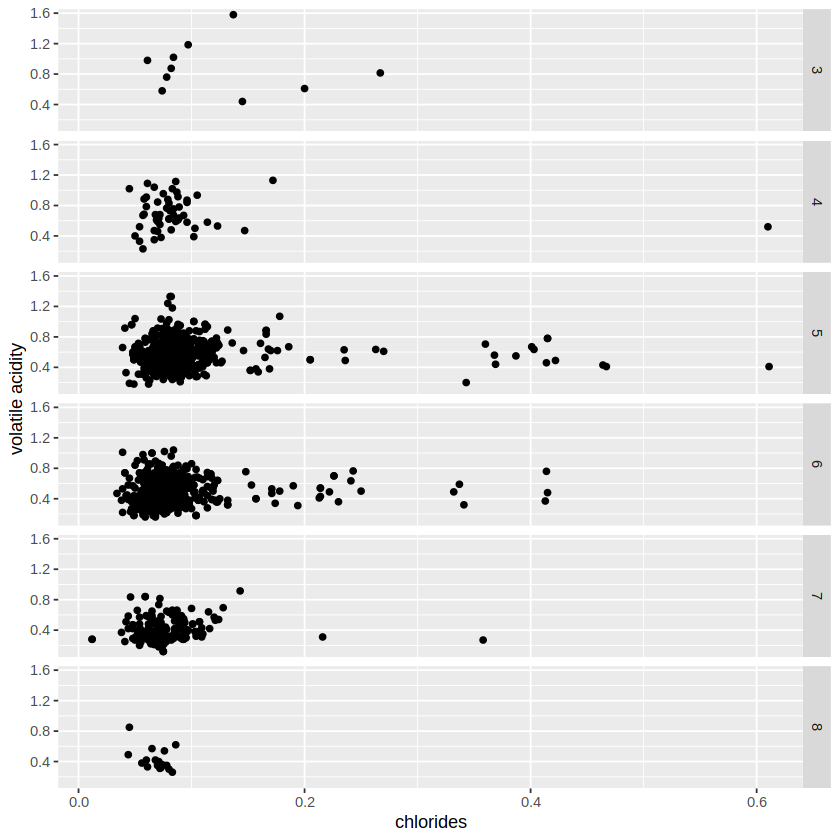

In [71]:
plot_3 <- red_wine_data |>
    ggplot(aes(x = `chlorides`, y = `volatile acidity` )) +
    facet_grid(rows = vars(quality)) +
    geom_point()
plot_3

In [75]:
wine_data_select <- red_wine_data |>
    select(quality, `volatile acidity`, `chlorides`)

wine_data_select

quality,volatile acidity,chlorides
<fct>,<dbl>,<dbl>
5,0.70,0.076
5,0.88,0.098
5,0.76,0.092
⋮,⋮,⋮
6,0.510,0.076
5,0.645,0.075
6,0.310,0.067
